In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [17]:
df = pd.read_csv('Coffee.csv')
df 

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
2336,2024-11-16,2024-11-16 12:49:35.127,card,ANON-0000-0000-0913,35.76,Latte
2337,2024-11-16,2024-11-16 13:16:55.479,card,ANON-0000-0000-0819,30.86,Americano with Milk
2338,2024-11-16,2024-11-16 13:18:00.476,card,ANON-0000-0000-0914,35.76,Latte
2339,2024-11-16,2024-11-16 13:19:09.028,card,ANON-0000-0000-0914,35.76,Latte


In [18]:
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [19]:
df.tail()  

,date,datetime,cash_type,card,money,coffee_name
2336,2024-11-16,2024-11-16 12:49:35.127,card,ANON-0000-0000-0913,35.76,Latte
2337,2024-11-16,2024-11-16 13:16:55.479,card,ANON-0000-0000-0819,30.86,Americano with Milk
2338,2024-11-16,2024-11-16 13:18:00.476,card,ANON-0000-0000-0914,35.76,Latte
2339,2024-11-16,2024-11-16 13:19:09.028,card,ANON-0000-0000-0914,35.76,Latte
2340,2024-11-16,2024-11-16 14:25:47.388,card,ANON-0000-0000-0915,30.86,Americano with Milk


In [20]:
print(df.columns) 

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')


In [21]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object

In [22]:
df.describe() 

,date,datetime,money
count,2341,2341,2341.000000
mean,2024-07-25 14:24:51.670226432,2024-07-26 05:13:19.630455296,31.816736
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,18.120000
25%,2024-05-24 00:00:00,2024-05-24 18:17:40.329999872,27.920000
50%,2024-08-05 00:00:00,2024-08-05 09:19:19.176000,32.820000
75%,2024-10-01 00:00:00,2024-10-01 12:14:23.382000128,35.760000
max,2024-11-16 00:00:00,2024-11-16 14:25:47.388000,40.000000
std,NaN,NaN,5.094530


In [23]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2341 non-null   datetime64[ns]
 1   datetime     2341 non-null   datetime64[ns]
 2   cash_type    2341 non-null   object        
 3   card         2252 non-null   object        
 4   money        2341 non-null   float64       
 5   coffee_name  2341 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 109.9+ KB


In [24]:
unique_coffee_types = df['coffee_name'].nunique()
print("Number of unique coffee types:", unique_coffee_types)
total_money_spent = df['money'].sum()
print(f"Total Money Spent: {total_money_spent}")

Number of unique coffee types: 8
Total Money Spent: 74482.98000000001


In [25]:
coffee_spending = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
print(coffee_spending)
coffee_count = df['coffee_name'].value_counts()
print(coffee_count) 

coffee_name
Latte                  19748.78
Americano with Milk    17091.22
Cappuccino             11990.70
Americano               7871.34
Hot Chocolate           6346.14
Cortado                 5717.66
Cocoa                   3850.56
Espresso                1866.58
Name: money, dtype: float64
coffee_name
Americano with Milk    559
Latte                  555
Cappuccino             332
Americano              301
Cortado                222
Hot Chocolate          175
Cocoa                  108
Espresso                89
Name: count, dtype: int64


cash_type
card    71296.98
cash     3186.00
Name: money, dtype: float64


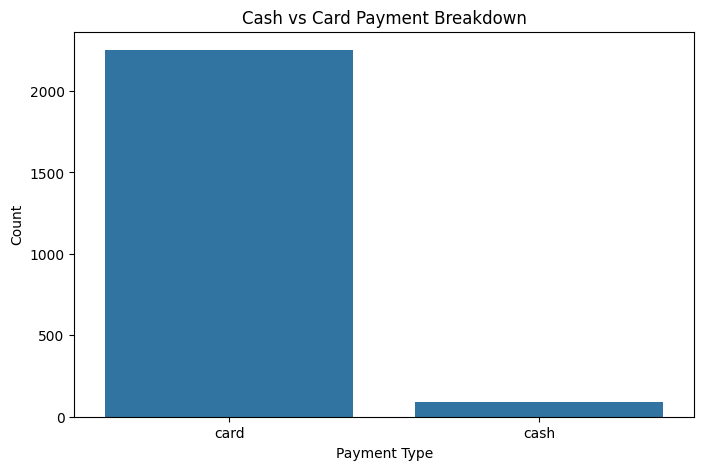

In [26]:
payment_method_spending = df.groupby('cash_type')['money'].sum()
print(payment_method_spending)
payment_type = df['cash_type'].value_counts()
plt.figure(figsize=(8,5))
sns.countplot(x='cash_type', data=df)
plt.title('Cash vs Card Payment Breakdown')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show() 

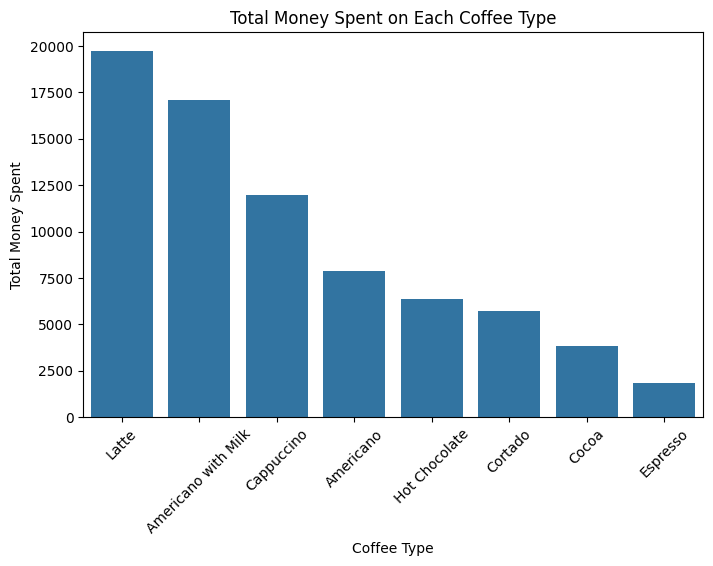

In [27]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(x=coffee_spending.index, y=coffee_spending.values)
plt.title('Total Money Spent on Each Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Total Money Spent')
plt.xticks(rotation=45)
plt.show() 

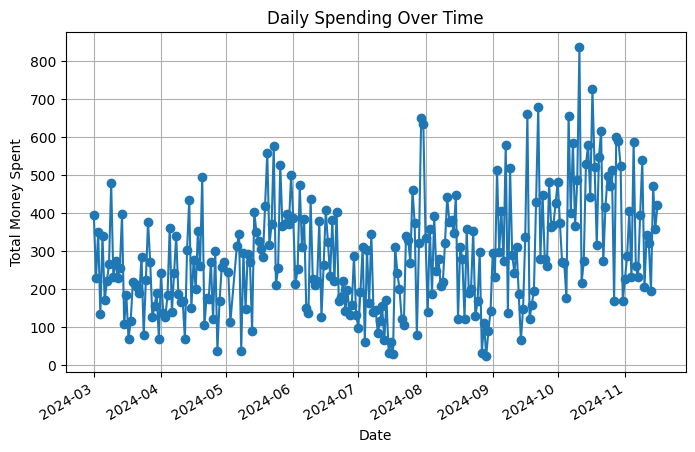

In [28]:
daily_spending = df.groupby('date')['money'].sum()
plt.figure(figsize=(8,5))
daily_spending.plot(kind='line', marker='o')
plt.title('Daily Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Money Spent')
plt.grid(True)
plt.show() 

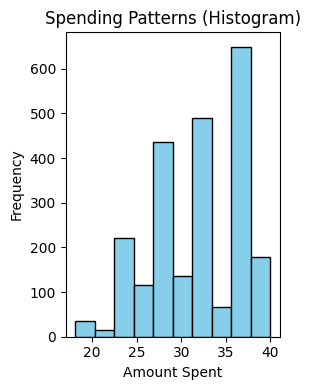

In [29]:
plt.figure(figsize=(3,4))
plt.hist(df['money'], bins=10, color='skyblue', edgecolor='black')
plt.title('Spending Patterns (Histogram)')
plt.xlabel('Amount Spent')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [30]:
repeated_payments = df.groupby(['coffee_name', 'money']).size().reset_index(name='Count')
repeated_payments = repeated_payments[repeated_payments['Count'] > 1]
print("\nRepeated Payments (Coffee, Money and Count):")
print(repeated_payments)


Repeated Payments (Coffee, Money and Count):
            coffee_name  money  Count
0             Americano  23.02     98
1             Americano  25.96     64
2             Americano  27.92     72
3             Americano  28.90     53
4             Americano  29.00      8
5             Americano  30.00      6
6   Americano with Milk  27.92    222
7   Americano with Milk  30.86    124
8   Americano with Milk  32.82    147
9   Americano with Milk  33.80     51
10  Americano with Milk  34.00      7
11  Americano with Milk  35.00      8
12           Cappuccino  32.82     96
13           Cappuccino  35.76     66
14           Cappuccino  37.72    116
15           Cappuccino  38.70     39
16           Cappuccino  39.00      5
17           Cappuccino  40.00     10
18                Cocoa  32.82     27
19                Cocoa  35.76     54
20                Cocoa  37.72     14
21                Cocoa  38.70      9
22                Cocoa  39.00      3
24              Cortado  23.02     89
25  